<a href="https://colab.research.google.com/github/jacob-desselles/DS-Unit-2-Applied-Modeling/blob/master/DS-Unit-2-Applied-Modeling/Jacob_Desselles_LS_DS_231_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [0]:
import pandas as pd
df = pd.read_csv('Islander_data.csv')
!pip install --upgrade category_encoders

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.6/dist-packages (2.2.2)


In [0]:
df

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1
...,...,...,...,...,...,...,...,...,...
193,Jacob,Novak,52,H,3,T,71.3,74.3,3.0
194,Teo,Steiner,41,S,3,T,72.5,70.4,-2.1
195,Alexander,Takahashi,54,S,3,T,30.8,33.1,2.3
196,Alexandere,Takahashi,40,H,3,T,53.6,53.8,0.2


In [0]:
target = 'Diff'

In [0]:
df = df.drop(columns=['first_name','last_name'])

In [0]:
df

,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,25,H,1,A,63.5,61.2,-2.3
1,52,S,1,A,41.6,40.7,-0.9
2,29,H,1,A,59.7,55.1,-4.6
3,50,S,1,A,51.7,51.2,-0.5
4,52,H,1,A,47.0,47.1,0.1
...,...,...,...,...,...,...,...
193,52,H,3,T,71.3,74.3,3.0
194,41,S,3,T,72.5,70.4,-2.1
195,54,S,3,T,30.8,33.1,2.3
196,40,H,3,T,53.6,53.8,0.2


In [0]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df, train_size=0.80, test_size=0.20)

In [0]:
train

,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
108,37,S,2,S,76.3,74.8,-1.5
28,28,H,2,A,43.9,46.8,2.9
172,32,H,2,T,77.8,72.2,-5.6
155,60,H,2,T,76.1,73.1,-3.0
6,35,S,1,A,44.1,56.0,11.9
...,...,...,...,...,...,...,...
93,35,H,2,S,46.0,43.2,-2.8
161,54,H,2,T,55.2,51.7,-3.5
59,47,H,3,A,65.6,86.4,20.8
197,32,S,3,T,43.1,42.1,-1.0


In [0]:
test

,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
117,25,S,3,S,44.1,41.5,-2.6
82,40,H,1,S,56.9,59.2,2.3
10,63,S,1,A,90.0,102.0,12.0
186,28,H,3,T,60.2,55.7,-4.5
132,27,S,3,S,40.0,42.2,2.2
184,51,S,3,T,72.1,74.3,2.2
54,53,S,3,A,54.8,88.2,33.4
170,38,S,2,T,43.4,47.4,4.0
89,28,H,2,S,36.0,35.8,-0.2
90,46,H,2,S,54.8,65.4,10.6


In [0]:
test.shape

(40, 7)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


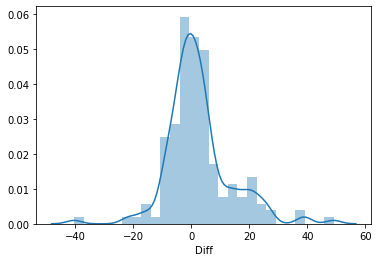

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(train['Diff']);

There are clearly some outliers, but since the outliers seems to have a few other people in those groups, rather than removing them, we're going to include them. However, we should take a closer look at what we're dealing with since there are a wide number of factors that go into our results.

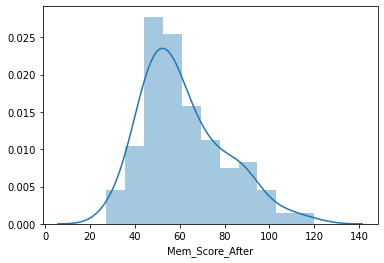

In [0]:
sns.distplot(train['Mem_Score_After'])

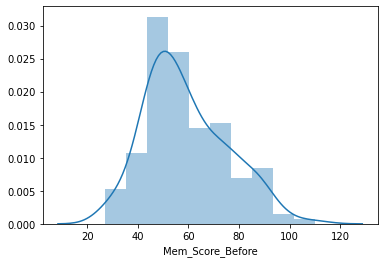

In [0]:
sns.distplot(train['Mem_Score_Before'])

For the most part, it seems our distribution is relatively balance, our data's relatively clean, and there is no skewing.

In [0]:
df.describe()

,age,Dosage,Mem_Score_Before,Mem_Score_After,Diff
count,198.000000,198.000000,198.000000,198.000000,198.000000
mean,39.530303,1.989899,57.967677,60.922222,2.954545
std,12.023099,0.818504,15.766007,18.133851,10.754603
min,24.000000,1.000000,27.200000,27.100000,-40.400000
25%,30.000000,1.000000,46.525000,47.175000,-3.175000
50%,37.000000,2.000000,54.800000,56.750000,1.700000
75%,48.000000,3.000000,68.400000,73.250000,5.925000
max,83.000000,3.000000,110.000000,120.000000,49.000000


What's interesting to me is that our min is -40, our max is 49, and our median is 1.7. This means that what I thought were outliers was actually just symbolic of a wide variety of data.
Before moving forward, I have a hypothesis on why this is: when analyzing the head and tail beforehand, I've noticed that in majority of cases, the happy groups had more trouble with the memory test, meanwhile the sad groups excelled more. Although the dataset doesn't necessarily describe how happy or how sad, I think that the more extreme the emotion, the easier or harder it becomes to recall memory. Let's move on to evaluation metrics.

In [0]:
from sklearn.model_selection import train_test_split
train,val=train_test_split(train, train_size=0.80, test_size=0.20)

In [0]:
import category_encoders as ce
encoder = ce.OneHotEncoder(use_cat_names=True)
train = encoder.fit_transform(train)
val = encoder.transform(val)
test = encoder.transform(test)

In [0]:
target = 'Diff'
features = train.columns.drop([target])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [0]:
train

,age,Happy_Sad_group_H,Happy_Sad_group_S,Dosage,Drug_T,Drug_A,Drug_S,Mem_Score_Before,Mem_Score_After,Diff
171,37,1,0,2,1,0,0,44.5,47.7,3.2
4,52,1,0,1,0,1,0,47.0,47.1,0.1
97,50,0,1,2,0,0,1,76.8,78.5,1.7
157,83,1,0,2,1,0,0,44.2,44.5,0.3
134,27,1,0,1,1,0,0,51.4,51.4,0.0
...,...,...,...,...,...,...,...,...,...,...
191,33,0,1,3,1,0,0,39.8,44.3,4.5
115,49,1,0,3,0,0,1,62.8,54.1,-8.7
87,30,1,0,1,0,0,1,59.6,56.8,-2.8
105,28,1,0,2,0,0,1,79.7,88.9,9.2


In [0]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
for alpha in [0.001, 0.01, 0.1, 1.0, 1, 100.0, 1000.0]:
    model = Ridge(alpha=alpha, normalize=True)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
y_pred = model.predict(X_val)
mse=mean_squared_error(y_val,y_pred)
r2 = r2_score(y_val, y_pred)
rmse=np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
print('Test MSE:',mse)
print('Test R^2:',r2)
print('Test RMSE:',rmse)

Test MSE: 105.16776790299144
Test R^2: -0.0754459804132408
Test RMSE: 10.25513373403738
